In [2]:
%pip install -q transformers huggingface_hub
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Using pre-trained transformers (2 points)
_for fun and profit_

There are many toolkits that let you access pre-trained transformer models, but the most powerful and convenient by far is [`huggingface/transformers`](https://github.com/huggingface/transformers). In this week's practice, you'll learn how to download, apply and modify pre-trained transformers for a range of tasks. Buckle up, we're going in!


__Pipelines:__ if all you want is to apply a pre-trained model, you can do that in one line of code using pipeline. Huggingface/transformers has a selection of pre-configured pipelines for masked language modelling, sentiment classification, question aswering, etc. ([see full list here](https://huggingface.co/transformers/main_classes/pipelines.html))

A typical pipeline includes:
* pre-processing, e.g. tokenization, subword segmentation
* a backbone model, e.g. bert finetuned for classification
* output post-processing

Let's see it in action:

In [35]:
import transformers
classifier = transformers.pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

print(classifier("BERT is aweful!"))

[{'label': 'POSITIVE', 'score': 0.9997313618659973}]


In [4]:
import base64
data = {
    'arryn': 'As High as Honor.',
    'baratheon': 'Ours is the fury.',
    'stark': 'Winter is coming.',
    'tyrell': 'Growing strong.'
}

# YOUR CODE: predict sentiment for each noble house and create outputs dict

outputs = dict((k,classifier(v)[0]['label'] == 'POSITIVE') for k,v in data.items())

assert sum(outputs.values()) == 3 and outputs[base64.decodebytes(b'YmFyYXRoZW9u\n').decode()] == False
print("Well done!")

Well done!


You can also access vanilla Masked Language Model that was trained to predict masked words. Here's how:

In [5]:
mlm_model = transformers.pipeline('fill-mask', model="bert-base-uncased")
MASK = mlm_model.tokenizer.mask_token

for hypo in mlm_model(f"Thomas {MASK} is the president of the united states."):
  print(f"P={hypo['score']:.5f}", hypo['sequence'])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


P=0.81465 thomas jefferson is the president of the united states.
P=0.03966 thomas dewey is the president of the united states.
P=0.00732 thomas marshall is the president of the united states.
P=0.00611 thomas edison is the president of the united states.
P=0.00562 thomas trump is the president of the united states.


In [6]:
# Your turn: use bert to recall what year was the Soviet Union founded in
mlm_model(f"Soviet Union was founded in the year {MASK}.")

[{'score': 0.039382245391607285,
  'token': 4585,
  'token_str': '1917',
  'sequence': 'soviet union was founded in the year 1917.'},
 {'score': 0.0273779034614563,
  'token': 4271,
  'token_str': '1918',
  'sequence': 'soviet union was founded in the year 1918.'},
 {'score': 0.015172134153544903,
  'token': 4444,
  'token_str': '1920',
  'sequence': 'soviet union was founded in the year 1920.'},
 {'score': 0.014308714307844639,
  'token': 4878,
  'token_str': '1912',
  'sequence': 'soviet union was founded in the year 1912.'},
 {'score': 0.01420627348124981,
  'token': 5141,
  'token_str': '1900',
  'sequence': 'soviet union was founded in the year 1900.'}]

```

```

```

```


Huggingface offers hundreds of pre-trained models that specialize on different tasks. You can quickly find the model you need using [this list](https://huggingface.co/models).


In [7]:
pipe = transformers.pipeline("ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassificati

In [8]:
text = """Almost two-thirds of the 1.5 million people who viewed this liveblog had Googled to discover
 the latest on the Rosetta mission. They were treated to this detailed account by the Guardian’s science editor,
 Ian Sample, and astronomy writer Stuart Clark of the moment scientists landed a robotic spacecraft on a comet
 for the first time in history, and the delirious reaction it provoked at their headquarters in Germany.
  “We are there. We are sitting on the surface. Philae is talking to us,” said one scientist.
"""


named_entities = pipe(text)

In [9]:
print('OUTPUT:', named_entities)
word_to_entity = {item['word']: item['entity'] for item in named_entities}
assert 'org' in word_to_entity.get('Guardian').lower() and 'per' in word_to_entity.get('Stuart').lower()
print("All tests passed")

OUTPUT: [{'entity': 'I-MISC', 'score': 0.88031065, 'index': 19, 'word': 'Google', 'start': 73, 'end': 79}, {'entity': 'I-MISC', 'score': 0.90050745, 'index': 27, 'word': 'Rose', 'start': 112, 'end': 116}, {'entity': 'I-MISC', 'score': 0.95096284, 'index': 28, 'word': '##tta', 'start': 116, 'end': 119}, {'entity': 'I-ORG', 'score': 0.99925345, 'index': 40, 'word': 'Guardian', 'start': 179, 'end': 187}, {'entity': 'I-PER', 'score': 0.999201, 'index': 46, 'word': 'Ian', 'start': 207, 'end': 210}, {'entity': 'I-PER', 'score': 0.9994999, 'index': 47, 'word': 'Sam', 'start': 211, 'end': 214}, {'entity': 'I-PER', 'score': 0.99649787, 'index': 48, 'word': '##ple', 'start': 214, 'end': 217}, {'entity': 'I-PER', 'score': 0.9991856, 'index': 53, 'word': 'Stuart', 'start': 240, 'end': 246}, {'entity': 'I-PER', 'score': 0.99964833, 'index': 54, 'word': 'Clark', 'start': 247, 'end': 252}, {'entity': 'I-LOC', 'score': 0.9998211, 'index': 85, 'word': 'Germany', 'start': 413, 'end': 420}, {'entity': 'I

### The building blocks of a pipeline

Huggingface also allows you to access its pipelines on a lower level. There are two main abstractions for you:
* `Tokenizer` - converts from strings to token ids and back
* `Model` - a pytorch `nn.Module` with pre-trained weights

You can use such models as part of your regular pytorch code: insert is as a layer in your model, apply it to a batch of data, backpropagate, optimize, etc.

In [10]:
slavics = transformers.AutoModel.from_pretrained("DeepPavlov/bert-base-bg-cs-pl-ru-cased")

Some weights of the model checkpoint at DeepPavlov/bert-base-bg-cs-pl-ru-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased')
model = transformers.AutoModel.from_pretrained('bert-base-uncased')


In [12]:
lines = [
    "Luke, I am your father.",
    "Life is what happens when you're busy making other plans.",
    ]

# tokenize a batch of inputs. "pt" means [p]y[t]orch tensors
tokens_info = tokenizer(lines, padding=True, truncation=True, return_tensors="pt")

for key in tokens_info:
    print(key, tokens_info[key])

print("Detokenized:")
for i in range(2):
    print(tokenizer.decode(tokens_info['input_ids'][i]))

input_ids tensor([[ 101, 5355, 1010, 1045, 2572, 2115, 2269, 1012,  102,    0,    0,    0,
            0,    0,    0],
        [ 101, 2166, 2003, 2054, 6433, 2043, 2017, 1005, 2128, 5697, 2437, 2060,
         3488, 1012,  102]])
token_type_ids tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Detokenized:
[CLS] luke, i am your father. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[CLS] life is what happens when you're busy making other plans. [SEP]


In [13]:
# You can now apply the model to get embeddings
with torch.no_grad():
    out = model(**tokens_info)

print(out['pooler_output'])

tensor([[-0.8854, -0.4722, -0.9392,  ..., -0.8081, -0.6955,  0.8748],
        [-0.9297, -0.5161, -0.9334,  ..., -0.9017, -0.7492,  0.9201]])


In [14]:
class MyBertBasedClassifier(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.bert = transformers.AutoModel.from_pretrained('bert-base-uncased')
        self.head = nn.Linear(768,2)

    def forward(self, **kwargs):
        out = model(**tokens_info)['pooler_output']
        return self.head(out)

In [15]:
clf = MyBertBasedClassifier()
opt = torch.optim.Adam(clf.parameters())

In [16]:

for i in range(100):
    opt.zero_grad()
    logits = clf(**tokens_info)
    loss = F.cross_entropy(logits,torch.Tensor([1,0]).long())
    loss.backward()
    opt.step()
    print(loss.item())

0.7166060209274292
0.7112159729003906
0.6794341802597046
0.6755895018577576
0.649658739566803
0.6304234266281128
0.6214749813079834
0.6051462888717651
0.5847465395927429
0.5703722238540649
0.5592254400253296
0.5440928339958191
0.5269153714179993
0.5129096508026123
0.5014208555221558
0.4882936477661133
0.47349828481674194
0.4601845145225525
0.4489784836769104
0.4375090003013611
0.4248185157775879
0.4125506281852722
0.40183883905410767
0.39163586497306824
0.3807925581932068
0.36988627910614014
0.35995471477508545
0.3507785499095917
0.3414666950702667
0.3319700360298157
0.3229753375053406
0.314691424369812
0.30661433935165405
0.29843926429748535
0.29048001766204834
0.28305116295814514
0.27597782015800476
0.268950879573822
0.26201242208480835
0.2554088234901428
0.24916982650756836
0.24309825897216797
0.23710152506828308
0.23129728436470032
0.22578585147857666
0.22049683332443237
0.21531805396080017
0.21025815606117249
0.20539970695972443
0.20075646042823792
0.1962597519159317
0.19186553359

Transformers knowledge hub: https://huggingface.co/transformers/

### Build-a-transformer (2 points)

In this section, you will implement a transformer language model layer by layer, then use it to generate (hopefully) coherent text.

To understand how these layers work, please check out our guide to transformers from [nlp course for you -> transformers](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#transformer_intro).


First, we download pre-trained weights for the [GPT2 model by OpenAI](https://openai.com/research/better-language-models) - a prominent model from 2019.



Idea & code by: Ilya Beletsky

In [17]:
from huggingface_hub import hf_hub_download
state_dict = torch.load(hf_hub_download("gpt2", filename="pytorch_model.bin"))
for key, value in tuple(state_dict.items()):
    if key.startswith('h.') and key.endswith('.weight') and value.ndim == 2:
        value.transpose_(1, 0)  # <-- for compatibility with modern PyTorch modules
    if key.startswith('h.') and key.endswith('.attn.bias') and value.ndim == 4:
        state_dict.pop(key)  # <-- triangular binar masks, not needed in this code

print('Weights:', repr(sorted(state_dict.keys()))[:320], '...')

Weights: ['h.0.attn.c_attn.bias', 'h.0.attn.c_attn.weight', 'h.0.attn.c_proj.bias', 'h.0.attn.c_proj.weight', 'h.0.ln_1.bias', 'h.0.ln_1.weight', 'h.0.ln_2.bias', 'h.0.ln_2.weight', 'h.0.mlp.c_fc.bias', 'h.0.mlp.c_fc.weight', 'h.0.mlp.c_proj.bias', 'h.0.mlp.c_proj.weight', 'h.1.attn.c_attn.bias', 'h.1.attn.c_attn.weight', 'h.1. ...


In the next few cells, we shall implement the model layer by layer to make use of those weights.

As you might recall, transformers contain two main layer types: attention and fully-connected layers.

The fully connected layers are by far easier to understand, so we shall begin there:

Please implement fully-connected layer __without residual or layer normalization__ (we'll add those in a bit).

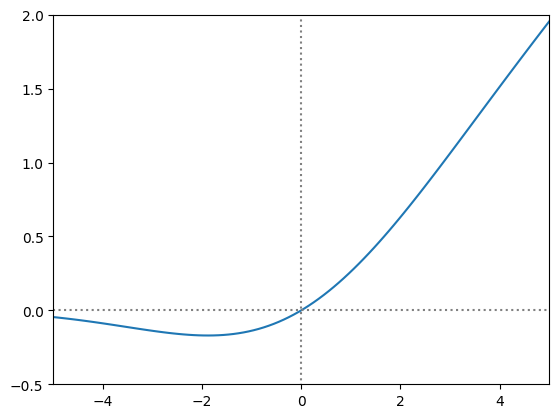

In [18]:
import matplotlib.pyplot as plt
gelu = lambda x : 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * x ** 3)))
plt.plot(np.linspace(-5,5,100),gelu(torch.linspace(-2,2,100)))
plt.hlines(0,-5,5,linestyles='dotted',colors = ['gray'])
plt.vlines(0,-5,5,linestyles='dotted',colors = ['gray'])
plt.xlim(-5,5)
plt.ylim(-0.5,2);

In [19]:
class GeLUThatWasUsedInGPT2(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * x ** 3)))

class FullyConnected(nn.Module):
    def __init__(self, dim: int):
        super().__init__()
        self.c_fc = nn.Linear(dim, 4  * dim)
        self.gelu = GeLUThatWasUsedInGPT2()
        self.c_proj = nn.Linear(4 * dim, dim)

    def forward(self, x):
        # x.shape = [batch_size, seq_length, dim]
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)

        
        return x


Now, let's test that it works with GPT-2 weights:

In [20]:
mlp = FullyConnected(dim=768)
mlp.load_state_dict({'c_fc.weight': state_dict['h.0.mlp.c_fc.weight'],
                     'c_fc.bias': state_dict['h.0.mlp.c_fc.bias'],
                     'c_proj.weight': state_dict['h.0.mlp.c_proj.weight'],
                     'c_proj.bias': state_dict['h.0.mlp.c_proj.bias']})

torch.manual_seed(1337)
x = torch.randn(1, 2, 768)  # [batch_size, sequence_length, dim]
checksum = torch.sum(mlp(x) * x)
assert abs(checksum.item() - 1282.3315) < 0.1, "layer outputs do not match reference"
assert torch.allclose(mlp(x[:, (1, 0), :])[:, (1, 0), :], mlp(x)), "mlp must be permutation-invariant"
print("Seems legit!")

Seems legit!


Now, let's get to attention layers.

Since GPT-2 needs to generate text from left to right, each generated token can only attend to tokens on the left (and itself). This kid of attention is called "Masked" self-attention, because it hides tokens to the right.

As before, please implement masked self-attention __without layernorm or residual connections.__

In [21]:
class MaskedSelfAttention(nn.Module):
    def __init__(self, dim: int, num_heads: int):
        super().__init__()
        self.c_attn = nn.Linear(dim, dim * 3)  # query + key + value, combined
        self.c_proj = nn.Linear(dim, dim)  # output projection
        self.dim, self.num_heads = dim, num_heads
        self.head_size = dim // num_heads

    def forward(self, x):
        q, k, v = self.c_attn(x).split(dim=-1, split_size=self.dim)
        assert q.shape == k.shape == v.shape == x.shape, "q, k and v must have the same shape as x"


        # Note: this is an inefficient implementation that uses a for-loop.
        # To get the full grade during homework, please re-implement this code:
        # 1) do not use for-loops (or other loops). Compute everything in parallel with vectorized operations
        # 2) do not use F.scaled_dot_product_attention - write your own attention code using basic PyTorch ops
        head_outputs = []
        for head_index in range(self.num_heads):
            head_selector = range(self.head_size * head_index, self.head_size * (head_index + 1))

            head_queries = q[..., head_selector]
            head_keys = k[..., head_selector]
            head_values = v[..., head_selector]

            single_head_output = F.scaled_dot_product_attention(
                head_queries,head_keys,head_values,
                is_causal=True)
            # docs: https://pytorch.org/docs/stable/generated/torch.nn.functional.scaled_dot_product_attention.html
            head_outputs.append(single_head_output)

        combined_head_outputs = torch.cat(head_outputs, dim=-1)
        return self.c_proj(combined_head_outputs)


Test that it works

In [22]:
attn = MaskedSelfAttention(dim=768, num_heads=12)
attn.load_state_dict({'c_attn.weight': state_dict['h.0.attn.c_attn.weight'],
                      'c_attn.bias': state_dict['h.0.attn.c_attn.bias'],
                      'c_proj.weight': state_dict['h.0.attn.c_proj.weight'],
                      'c_proj.bias': state_dict['h.0.attn.c_proj.bias']})

torch.manual_seed(1337)
x = torch.randn(1, 10, 768)  # [batch_size, sequence_length, dim]
checksum = torch.sum(attn(x) * x)
assert abs(checksum.item() - 2703.6772) < 0.1, "layer outputs do not match reference"
assert not torch.allclose(attn(x[:, (1, 0), :])[:, (1, 0), :], attn(x[:, (0, 1), :])), "masked attention must *not* be permutation-invariant"
print("It works!")

It works!


We can now combine attention and MLP to build the full transformer layer:

![img](https://i.imgur.com/1sq2vHO.png)

In [23]:
class TransformerLayer(nn.Module):
    def __init__(self, dim: int, num_heads: int):
        super().__init__()
        self.ln_1 = nn.LayerNorm(dim)
        self.attn = MaskedSelfAttention(dim, num_heads)
        self.ln_2 = nn.LayerNorm(dim)
        self.mlp = FullyConnected(dim)

    def forward(self, x):
        h1 = self.ln_1(x)
        h1 = self.attn(h1)
        x = h1+x
        h2 = self.ln_2(x)
        h2 = self.mlp(h2)
        x = h2+x

        return x

In [24]:
layer = TransformerLayer(dim=768, num_heads=12)
layer.load_state_dict({k[5:]: v for k, v in state_dict.items() if k.startswith('h.10.')})
assert abs(torch.sum(layer(x) * x).item() - 9874.7383) < 0.1
print("Good job!")

Good job!


In [43]:
class GPT2(nn.Module):
    def __init__(self, vocab_size: int, dim: int, num_heads: int, num_layers: int, max_position_embeddings: int = 1024):
        super().__init__()
        self.wte = nn.Embedding(vocab_size, dim)  # token embeddings
        self.wpe = nn.Embedding(max_position_embeddings, dim)  # position embeddings
        self.ln_f = nn.LayerNorm(dim)   # final layer norm - goes after all transformer layers, but before logits

        self.h = nn.Sequential(*(TransformerLayer(dim, num_heads) for layer in range(num_layers)))

    def forward(self, input_ids):
        # input_ids.shape: [batch_size, sequence_length], int64 token ids
        position_ids = torch.arange(input_ids.shape[1], device=input_ids.device).unsqueeze(0)

        token_embeddings = self.wte(input_ids)
        position_embeddings = self.wpe(position_ids)
        full_embeddings = token_embeddings + position_embeddings

        transformer_output = self.h(full_embeddings)
        transformer_output_ln = self.ln_f(transformer_output)

        # final layer: we predict logits by re-using token embeddings as linear weights
        output_logits = transformer_output_ln @ self.wte.weight.T
        return output_logits


In [44]:
tokenizer = transformers.AutoTokenizer.from_pretrained('gpt2', add_prefix_space=True)
model = GPT2(vocab_size=50257, dim=768, num_heads=12, num_layers=12)
model.load_state_dict(state_dict)

input_ids = tokenizer("A quick", return_tensors='pt')['input_ids']

predicted_logits = model(input_ids)
most_likely_token_id = predicted_logits[:, -1].argmax().item()

print("Prediction:", tokenizer.decode(most_likely_token_id))

Prediction:  look


In [45]:
text = "The Fermi paradox "
tokens = tokenizer.encode(text)
print(end=tokenizer.decode(tokens))
line_length = len(tokenizer.decode(tokens))

for i in range(500):
    # Predict logits with your model
    with torch.no_grad():
        logits = model(torch.as_tensor([tokens]))

    # Sample with probabilities
    p_next = torch.softmax(logits[0, -1, :], dim=-1).data.cpu().numpy()
    next_token_index = np.random.choice(len(p_next), p=p_next)

    tokens.append(int(next_token_index))
    print(end=tokenizer.decode(tokens[-1]))
    line_length += len(tokenizer.decode(tokens[-1]))
    if line_length > 120:
      line_length = 0
      print()



 The Fermi paradox  is linked with natural phopolitics. It implies that if Plato were to criticize Socrates, intelligent people
 wouldn't even watch him. The more (or, as Rakkhast-Ismail Jaidhari brings it, "nehites") diversity we want to see, the more
 his critique translates into some form of sort of rationalist idealism and compatibility\ with "hegemony." One might want
 to alternate between Eddington Mill and Ellersan, Conni-Poli, New Belgium, Essay on Poli-Poli, 99all go potato boundaries
 to get, Shuler 1893: Vermont nocturnal matites in wild grass.
Anyway, perhaps that's not entirely close. In fact, Melinda
 Harris started this qux and bumped it off here.  A LOT and a few second is all it takes to read Enutro about swords. And
 I do have the pleasure of catching her in any metro a recent afternoon.<|endoftext|>The image that made online Hillary Clinton
's campaign controversy believe "there's way too much money on the wing"[rue it, poor flame-black words]. But agitators are
 "lo

__Reminder:__ after class, please go to `MaskedSelfAttention.forward` above and finish the job!
```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Here's how you can do the same with transformers library

In [46]:
tokenizer = transformers.AutoTokenizer.from_pretrained('gpt2', add_prefix_space=True)
model = transformers.AutoModelForCausalLM.from_pretrained('gpt2')
print('Generated text:', tokenizer.decode(
    model.generate(
        **tokenizer("The Fermi paradox ", return_tensors='pt'),
        do_sample=True, max_new_tokens=200
    ).flatten().numpy()
))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text:  The Fermi paradox  is that the world around us is very close to nothing: there are no galaxies with small circles, there are only galaxies with huge and beautiful shapes, there are no vast "dows of light" in this sky, at least the one around you on one day.
We are so far away from galaxies because we no longer know how these phenomena are produced by this immense Universe. It's very simple. The universe is not as mysterious or infinite as we think. It is the Universe and we are the Universe. We are all parts of this Universe, and we are made to be part of it.
Well, this is not surprising. We live in an infinite Universe—and that infinite Universe is like a huge, beautiful world.
If anything, the Universe seems to make it look rather different then how galaxies in this galaxy are made to resemble a large, great cosmos. But the Universe isn't the way it looks. Rather what is happening is that the Universe has been moving
